#Hands on Machine Learning 




## Chapter 2 End to End California House


###**load Data**

In [1]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import os 
import tarfile
from six.moves import urllib 

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

###**Take a Quick Look at the Data Structure**

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

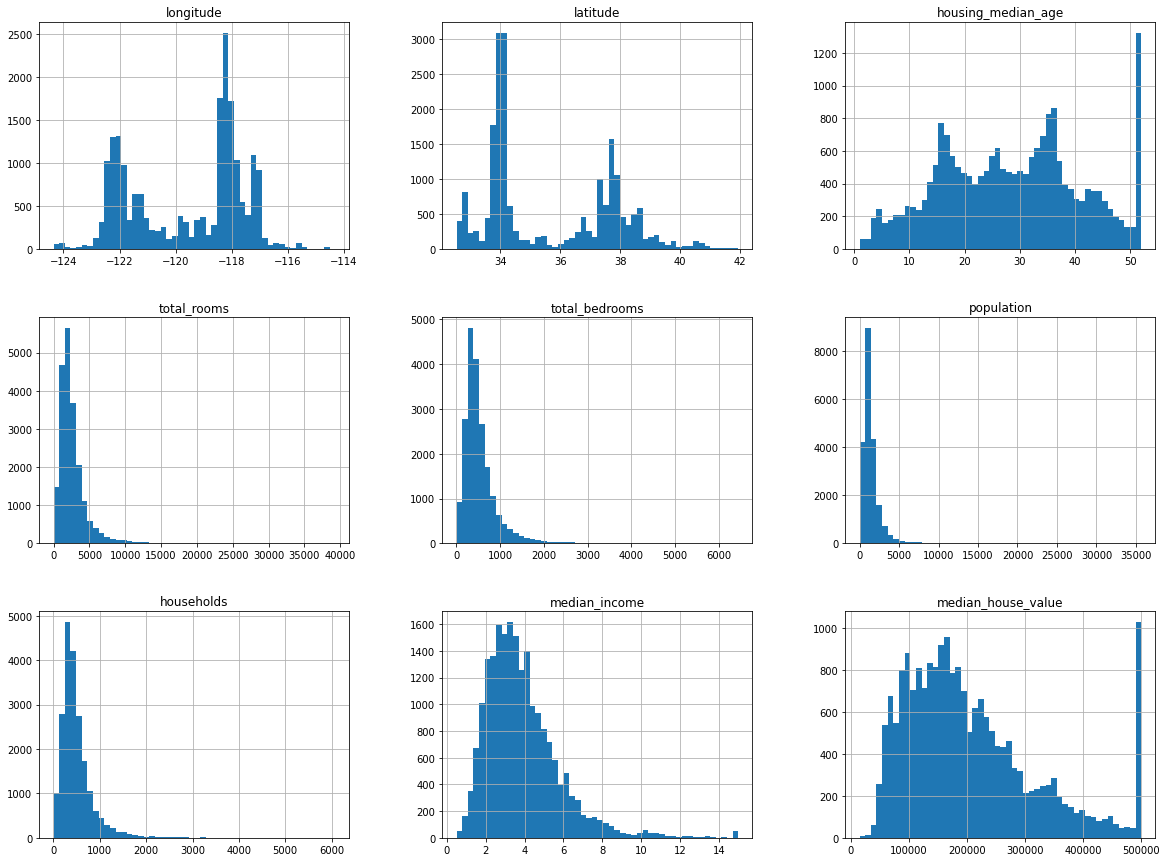

In [10]:
housing.hist(bins=50, figsize=(20, 15));

In [11]:
num_column = list(housing.describe().columns)
cat_column = ['ocean_proximity']

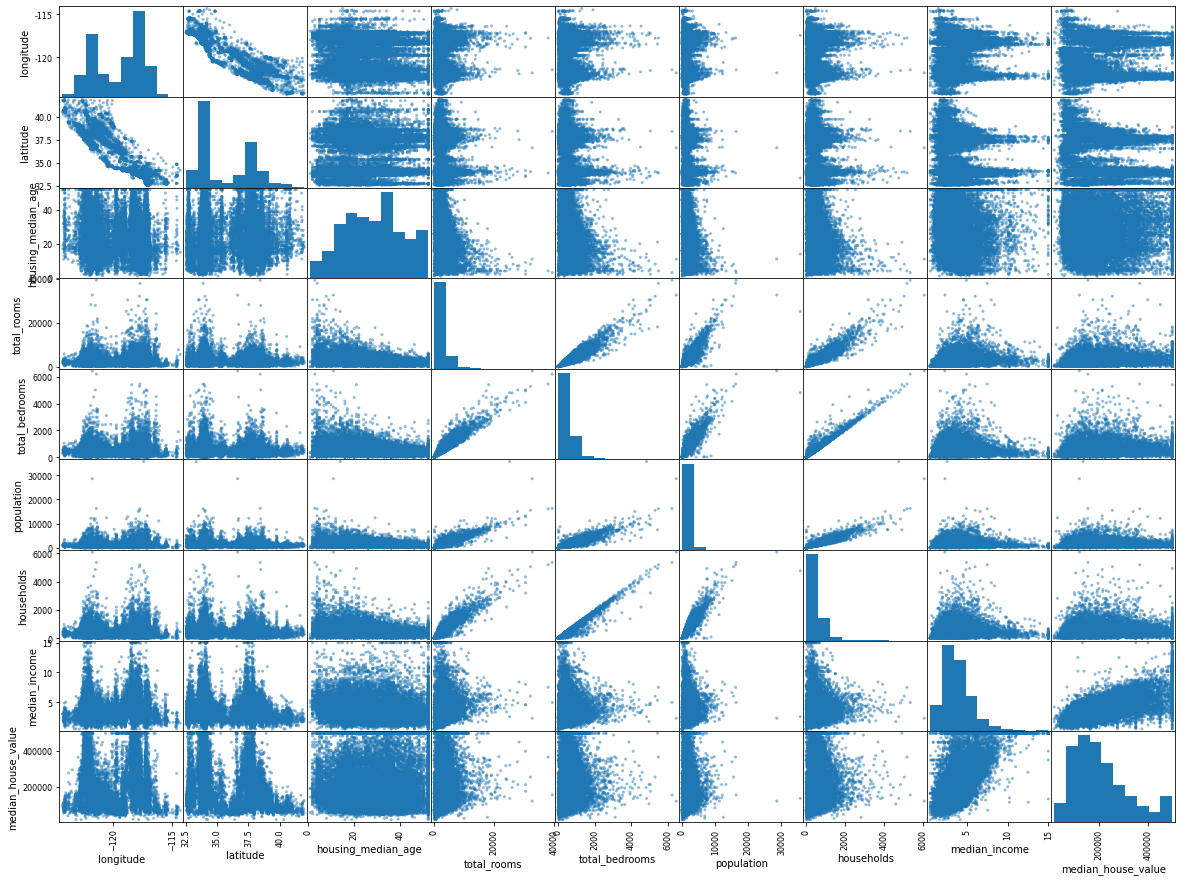

In [12]:
pd.plotting.scatter_matrix(housing[num_column], figsize=(20, 15));

In [13]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

###**Train Test Split**
Stratified Splitting

**median income** has a **strong** correlation with **median house value** <br>
we want to make sure that `train and test have the same distrubution of median income` 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

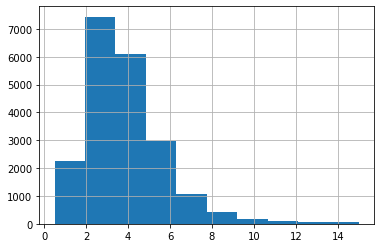

In [16]:
housing['median_income'].hist()

In [17]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

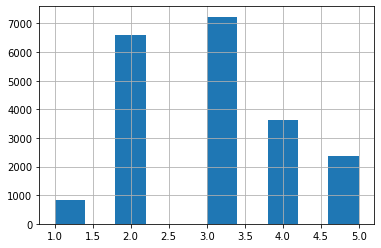

In [18]:
housing['income_cat'].hist()

In [19]:
for train_index, test_index in SSS.split(housing, housing['income_cat']):
    train = housing.loc[train_index]
    test = housing.loc[test_index]

In [20]:
print(len(train), len(test))

16512 4128


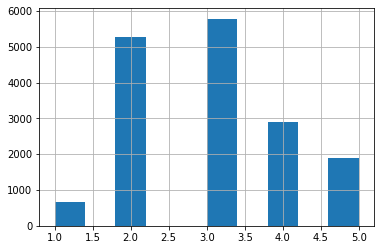

In [21]:
train['income_cat'].hist();

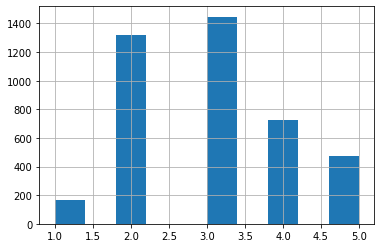

In [22]:
test['income_cat'].hist();

In [23]:
for set in (test, train):
    set.drop('income_cat', axis=1, inplace= True)


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


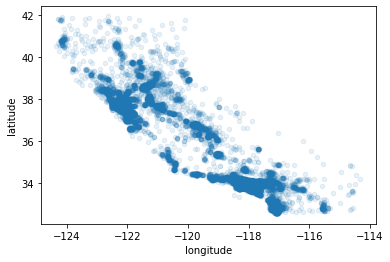

In [25]:
train.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1);

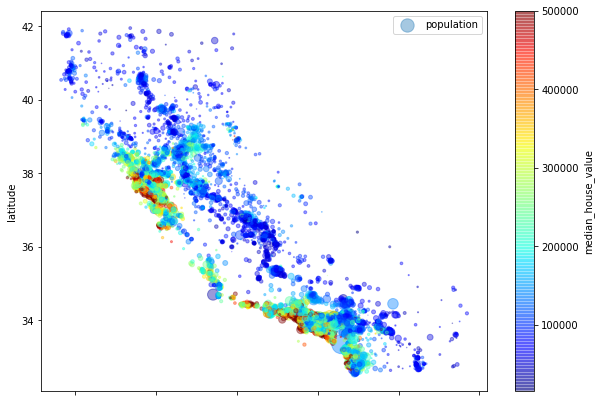

In [26]:
train.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4,
           s=train['population']/100, label='population', figsize=(10,7),
           c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True);

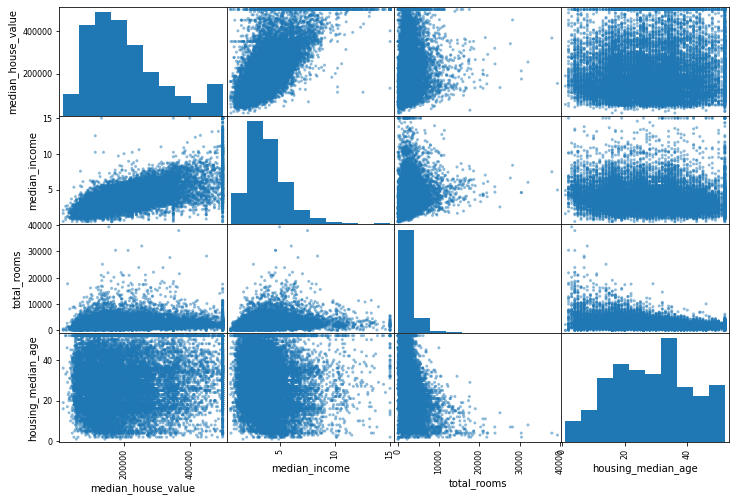

In [27]:
pd.plotting.scatter_matrix(train[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], figsize=(12,8));

(0.0, 18.0, 0.0, 550000.0)

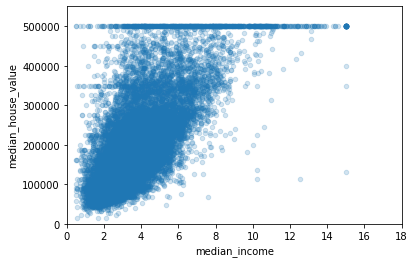

In [28]:
train.plot(kind='scatter', y='median_house_value', x='median_income', alpha=0.2)
plt.axis([0, 18, 0, 550000])

In [29]:
train['rooms_per_household'] = train['total_rooms'] / train['households']
train['bedrooms_per_rooms'] = train['total_bedrooms'] / train['total_rooms']
train['population_per_household'] = train['population'] / train['households']

### Prepare the data for Machine Learning algorithms

In [30]:
train_label = train['median_house_value']
train = train.drop("median_house_value", axis=1)

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy="median")

In [33]:
num_column =['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [34]:
X= imputer.fit(train[num_column])

In [35]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [36]:
train[num_column].median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [37]:
imputer.strategy

'median'

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer 

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

In [40]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names =attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values

In [41]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    def transform(self, x):
        return self.encoder.transform(x)

In [42]:
pipe1 = Pipeline([
                  ('selector', DataFrameSelector(num_column)),
                  ('imputer', SimpleImputer(strategy='median')),
                  ('stander_scaler', StandardScaler())
])

pipe2 = Pipeline([
                  ('selector', DataFrameSelector(cat_column)),
                  ('label_encoder', MyLabelBinarizer())
])

full_pipe = FeatureUnion(transformer_list=[
                                           ('num_transfer', pipe1),
                                           ('cat_transfer', pipe2)
])

In [43]:
train_prepared = full_pipe.fit_transform(train)

### **Select and train a model**

#### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

ln =LinearRegression()

In [45]:
ln.fit(train_prepared, train_label)

LinearRegression()

In [46]:
coe = list(ln.coef_)
coe

[-53158.46752878607,
 -54016.74420923746,
 13723.557529234404,
 -10022.164197153968,
 29937.919033152324,
 -43815.82009103997,
 28900.33562174599,
 73737.44249419366,
 -18139.052944786497,
 -57836.499818542885,
 112925.81797132856,
 -22517.51078879347,
 -14432.754419205781]

In [47]:

ln.intercept_

237792.18716701376

In [48]:
ln.score(train_prepared, train_label)

0.6438078994746375

In [49]:
from sklearn.metrics import mean_squared_error
prediction = ln.predict(train_prepared)
ln_mse = mean_squared_error(train_label, prediction)
ln_rmse = np.sqrt(ln_mse)
ln_rmse

69050.56219504567

In [50]:
ll= list(train.columns)

In [51]:
for i,ii in zip(train.columns, ln.coef_):
    print(i, ii)

longitude -53158.46752878607
latitude -54016.74420923746
housing_median_age 13723.557529234404
total_rooms -10022.164197153968
total_bedrooms 29937.919033152324
population -43815.82009103997
households 28900.33562174599
median_income 73737.44249419366
ocean_proximity -18139.052944786497
rooms_per_household -57836.499818542885
bedrooms_per_rooms 112925.81797132856
population_per_household -22517.51078879347


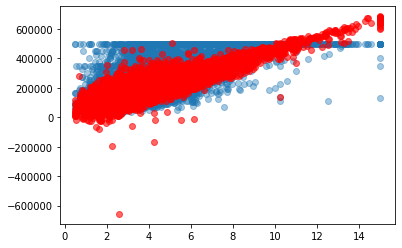

In [52]:
plt.scatter(x=train['median_income'], y=train_label, alpha=0.4)
plt.scatter(train['median_income'], prediction,color='red', alpha=0.6);

In [53]:
prediction.min()

-656409.8962396975

In [54]:
prediction.shape

(16512,)

In [55]:
np.where(prediction ==-656409.8962396975)

(array([3438]),)

In [57]:
p= prediction

In [61]:
p1= np.delete(p, (([3438]),))

In [63]:
np.where(p1==-656409.8962396975)

(array([], dtype=int64),)

In [68]:
l1 =np.delete(np.array(train_label), (([3438]),))

In [70]:
mi = train['median_income'].drop([3438])

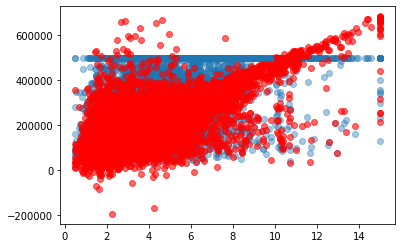

In [71]:
plt.scatter(x=mi, y=l1, alpha=0.4)
plt.scatter(mi, p1,color='red', alpha=0.6);

In [72]:
ln_mse = mean_squared_error(l1, p1)
ln_rmse = np.sqrt(ln_mse)
ln_rmse

68777.84767355098

#### Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

In [75]:
tree_reg.fit(train_prepared, train_label)

DecisionTreeRegressor(random_state=42)

In [76]:
p3 = tree_reg.predict(train_prepared)

In [78]:
from sklearn.metrics import mean_absolute_error
tree_mae = mean_absolute_error(train_label, p3)
tree_mse = mean_squared_error(train_label, p3)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Fine-tune your mode